<img src='./img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='20%'></img>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./31_cams_eac4_load_browse.ipynb"><< 31 - CAMS EAC4 - Load and browse</a>

<div class="alert alert-block alert-success">
<b>EXERCISE WORKBOOK</b></div>

# Copernicus Atmosphere Monitoring Service (CAMS) EAC4 

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses (EAC4)`, `fire emissions` and `greenhouse gas flux inversions`.

This notebook is an `exercise workbook`, where you can practise the data handling with CAMS Global reanalysis (EAC4)  data. The exercises base on the workflow introduced in the notebook [31 - CAMS EAC4 - Load and browse](./31_cams_eac4_load_browse.ipynb). We highly recommend that  you go through this notebook before you do this exercise workbook.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code. Code exercises base on the notebook [21 - Sentinel-3 OLCI Level 1B - Load and browse](./21_sentinel3_olci_l1_load_browse.ipynb).

You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

### Outline:
* [1 - Load, browse and plot CAMS fire emissions data](#cams_gfas)
* [2 - Example - CAMS regional forecast data](#cams_regional)
* [3 - Load, browse and plot CAMS greenhouse gas flux inversions](#load_ggf)

<hr>

#### Load required libraries

In [4]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [5]:
from ipynb.fs.full.functions import visualize_pcolormesh

<hr>

## <a id="cams_gfas"></a>Exercise example - Australian fires - Dec 2019

### <a id='load_browse'></a>1. Load and browse `EAC4 reanalysis` data

CAMS global reanalysis data is available either in `GRIB` or `netCDF`. The data for this example is available in `netCDF`. You can use xarray's function `xr.open_dataset()` to open the netCDF file as xarray Dataset.

In [6]:
file = xr.open_dataset('./data/cams_eac4/20191225-31_cams_eac4.nc')
file


<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 56)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2019-12-25 ... 2019-12-31T21:00:00
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
    aod550     (time, latitude, longitude) float32 ...
    tcco       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-25 08:11:01 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Let us inspect the three dimensions (`latitude`, `longitude` and `time`) of the loaded file: 
- What data variables does it contain and what `long_name` do they have?
</div>

You can retrieve the long_name of a data variable as follows: `file.omaod550.long_name` retrieves the long name of the `omaod550` variable.

The file contains three data variables:
* `omaod550`: Organic Matter Aerosol Optical Depth at 550nm
* `aod550`: Total Aerosol Optical Depth at 550nm
* `tcco`: Total column Carbon monoxide



<br>

### <a id='shift'></a>2. Bring longitude coordinates onto a [-180,180] grid

You can assign new values to coordinates in an xarray Dataset. You can do so with the `assign_coords()` function, which you can apply onto an xarray Dataset. With the code below, you shift your longitude grid from [0,360] to [-180,180]. At the end, you sort the longitude values in an ascending order.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which re-assigns the longitude values from a [0,360] grid to grid that ranges between [-180,180] degrees.<br>
Inspect the newly assigned `longitude` coordinates afterwards.
<br>


**HINT:** <br>
You can use xarray's function `assign_coords()` for this operation.
</div>

In [7]:
# Enter your solution here






In [8]:
file_assigned = file.assign_coords(longitude=(((file.longitude + 180) % 360) - 180)).sortby('longitude')
file_assigned.longitude

<xarray.DataArray 'longitude' (longitude: 480)>
array([-180.  , -179.25, -178.5 , ...,  177.75,  178.5 ,  179.25],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.25 -178.5 ... 177.75 178.5 179.25

<br>

### <a id='data_retrieve'></a>3. Retrieve the data variable `total column carbon monoxide` as xarray DataArray

Let us store the data variable `total column carbon monoxide` as xarray DataArray with the name `tcco`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code retrieves the data variable `total column carbon monoxide`. Call the resulting DataArray **tcco**.<br>
<br>


In [9]:
# Enter your solution here






In [10]:
tcco = file_assigned.tcco
tcco

<xarray.DataArray 'tcco' (time: 56, latitude: 241, longitude: 480)>
array([[[0.00088 , 0.00088 , ..., 0.00088 , 0.00088 ],
        [0.000877, 0.000876, ..., 0.000877, 0.000877],
        ...,
        [0.000258, 0.000258, ..., 0.000258, 0.000258],
        [0.00026 , 0.00026 , ..., 0.00026 , 0.00026 ]],

       [[0.000876, 0.000876, ..., 0.000876, 0.000876],
        [0.000873, 0.000873, ..., 0.000873, 0.000873],
        ...,
        [0.000258, 0.000258, ..., 0.000258, 0.000258],
        [0.00026 , 0.00026 , ..., 0.00026 , 0.00026 ]],

       ...,

       [[0.000836, 0.000836, ..., 0.000836, 0.000836],
        [0.000833, 0.000833, ..., 0.000833, 0.000833],
        ...,
        [0.000243, 0.000243, ..., 0.000242, 0.000242],
        [0.000246, 0.000246, ..., 0.000246, 0.000246]],

       [[0.000836, 0.000836, ..., 0.000836, 0.000836],
        [0.000834, 0.000834, ..., 0.000835, 0.000835],
        ...,
        [0.000242, 0.000242, ..., 0.000241, 0.000242],
        [0.000246, 0.000246, ..., 0.

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Can you identify the unit of the `tcco` variable?
</div>

The unit of the `total column carbon monoxide` variable is `kg m**-2`.

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Retrieve `long_name`, `units`, `latitude` and `longitude` information from the `tcco` DataArray and store them as individual variables.<br>
<br>


In [11]:
# Enter your solution here





In [12]:
long_name = tcco.long_name
units = tcco.units

latitude = tcco.latitude
longitude = tcco.longitude

<br>

### <a id='visualize'></a>4. Visualize `total column carbon monoxide`

Let us visualize the dataset. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code that visualizes the `total column carbon monoxide` Data Array and makes use of the following:

* the function visualize_pcolormesh,
* the assigned variables latitude and longitude, and
* the retrieved attributes `units` and `long_name`.
<br>

<b>HINT:</b><br> With `?visualize_pcolormesh`, you can see what keyword arguments the function requires.<br>
With xarray's function `.max()`, you can see the maximum values of the DataArray in order to adjust `vmax` limits.
</div>

In [13]:
?visualize_pcolormesh

In [ ]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fdf24278780>)

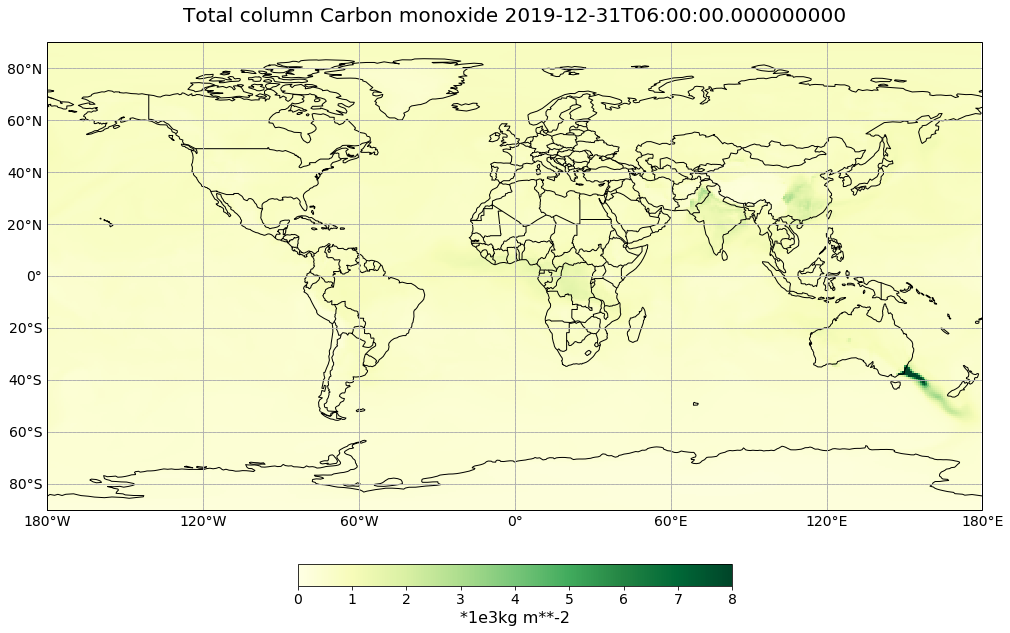

In [25]:
visualize_pcolormesh(
    tcco[50,:,:]*1e3,
    longitude,
    latitude,
    ccrs.PlateCarree(),
    'YlGn',
    '*1e3' + units,
    long_name + ' ' + str(tcco[50,:,:].time.data),
    0, 8,
    -180,180,-90,90,
    log=False,
    set_global=True
    )

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What factor is suitable to multiply the `tcco` values with in order to bring the data onto a scale between 0 and 8?
</div>

Multiplying the data by a factor of 1000 brings the data values onto a more readable data scale.

<br>

This is the end of the exercise workbook and we hope that you feel more familiar with the CAMS Global reanalysis (EAC4) data and understand how you can use the data for fire monitoring.

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./31_cams_eac4_load_browse.ipynb"><< 31 - CAMS EAC4 - Load and browse</a>

<hr>

<p><img src='./img/all_partners_wekeo.png' align='left' alt='Logo EU Copernicus' width='100%'></img></p>